The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

The aim of the dataset is to predict concrete compressive strength of high performance concrete (HPC) after 28 days as well as to determine the workability with the measurements of slump and slump flow.

Therefore, our target variables are:

* **target Y **

Concrete compressive strength after 28 days.
target Y

To predict our variables, we have these features available:

**input X

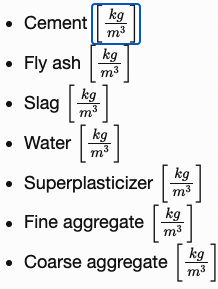

Let us have a closer look at some of the features:

**Fly ash and slag

Both features can be considered as binder together with cement. Both increase strength and durability of concrete. However, the hardening process takes longer and therefore it requires more time to reach full compressive strength.

**Superplasticizer

Superplasticizer are used to ensure better flow properties because they minimize particle segregation. Further, they allow to decrease the water-cement ratio which leads to higher compressive strength.

**Water 

Workability is influenced by the water content. It is obvious that with increasing water content the mixture will behave more an more fluid.
 


<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">


* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [3]:
concrete_slump_data = pd.read_csv("concrete_Slump_dataset.csv")
df = concrete_slump_data.copy()
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [3]:
df.shape

(103, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [6]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [7]:
df.describe().T

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [8]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


In [9]:
for i in df.drop(columns ="Compressive Strength (28-day)(Mpa)"):
    print(f"corr between Compressive Strength (28-day)(Mpa)  and {i:<12}:  {df['Compressive Strength (28-day)(Mpa)'].corr(df[i])}")

corr between Compressive Strength (28-day)(Mpa)  and Cement      :  0.445656142563621
corr between Compressive Strength (28-day)(Mpa)  and Slag        :  -0.33152226429150117
corr between Compressive Strength (28-day)(Mpa)  and Fly ash     :  0.44437968506874465
corr between Compressive Strength (28-day)(Mpa)  and Water       :  -0.2543201492378115
corr between Compressive Strength (28-day)(Mpa)  and SP          :  -0.037909280335955774
corr between Compressive Strength (28-day)(Mpa)  and Coarse Aggr.:  -0.16060986575287395
corr between Compressive Strength (28-day)(Mpa)  and Fine Aggr.  :  -0.15453179659662755
corr between Compressive Strength (28-day)(Mpa)  and SLUMP(cm)   :  -0.2234993688009328
corr between Compressive Strength (28-day)(Mpa)  and FLOW(cm)    :  -0.12418851574647044


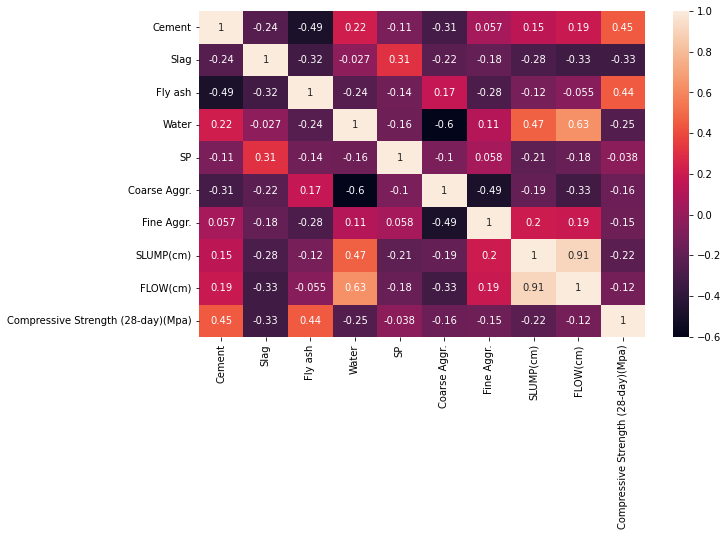

In [10]:
sns.heatmap(df.corr(), annot = True);

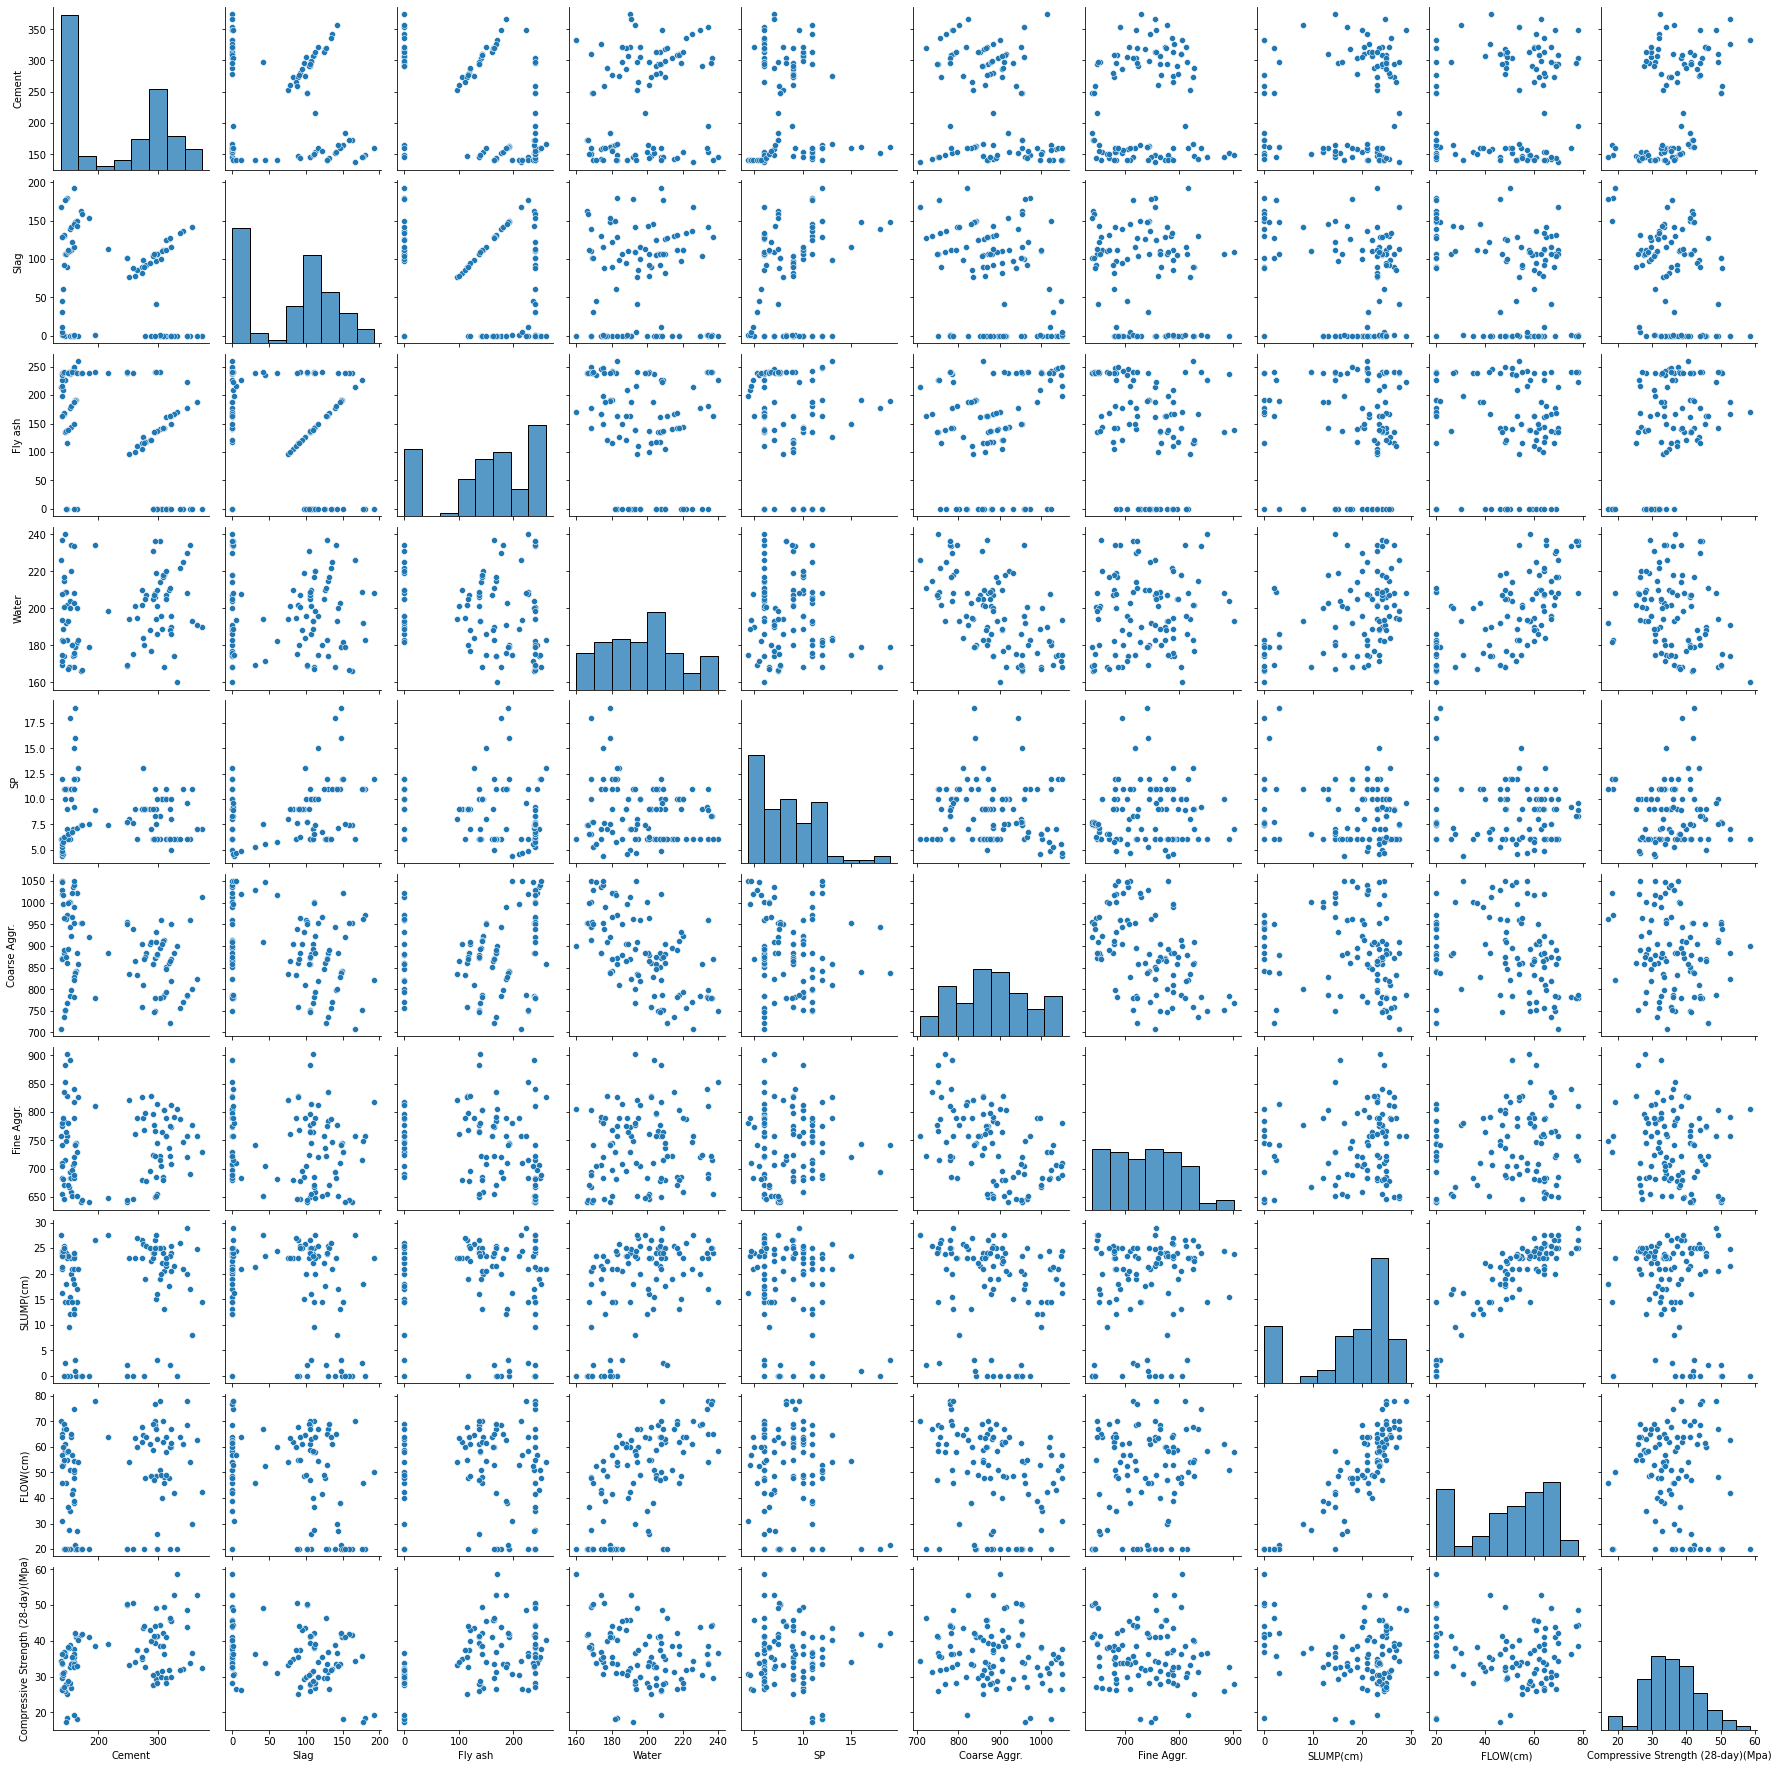

In [11]:
sns.pairplot(df);

# Data Preprocessing

### Features and target variable

In [12]:
X = df.drop(columns ="Compressive Strength (28-day)(Mpa)") 
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [16]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (72, 9)
Train target shape   :  (72,)
Test features shape  :  (31, 9)
Test target shape    :  (31,)


In [17]:
X_train.sample(5)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
77,261.000,78.000,100.000,201.000,9.000,864.000,761.000,23.000,63.500
41,154.000,141.000,181.000,234.000,11.000,797.000,683.000,23.000,65.000
88,150.400,110.900,239.700,168.100,6.500,1000.200,667.200,9.500,27.500
63,291.000,104.000,0.000,231.000,9.000,857.000,725.000,23.000,69.000
86,143.300,91.800,239.800,200.800,6.200,964.800,647.100,25.000,55.000


In [18]:
X_test.sample(3)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
67,166.000,0.000,260.000,183.000,13.000,859.000,827.000,21.000,54.000
85,140.500,61.100,238.900,182.500,5.700,1017.700,681.400,24.500,60.000
84,140.200,44.800,234.900,171.300,5.500,1047.600,704.000,23.500,52.500


In [19]:
y_test.sample(5)

9    38.460
62   28.290
33   35.520
76   32.570
31   43.950
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [20]:
def plot_relation(df, target_var):
    num_cols = df.columns
    for col in num_cols:
        if col != target_var:
            plt.figure()
            sns.lmplot(x=col, y=target_var, data=df, height=7)
            plt.xlabel(f"variable name: {col}")
            plt.ylabel("Compressive Strength (28-day)(Mpa)")

<Figure size 720x432 with 0 Axes>

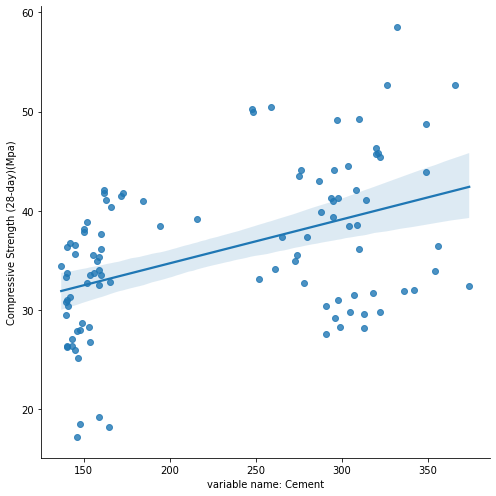

<Figure size 720x432 with 0 Axes>

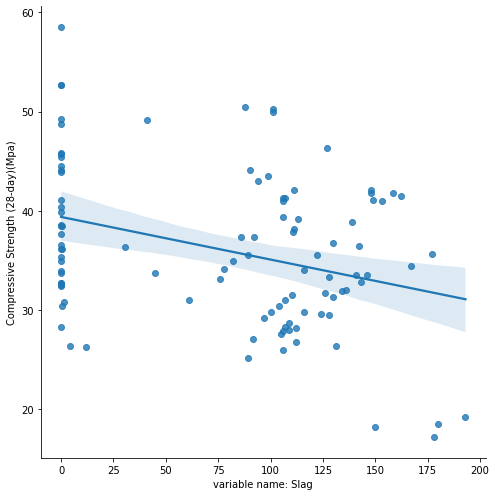

<Figure size 720x432 with 0 Axes>

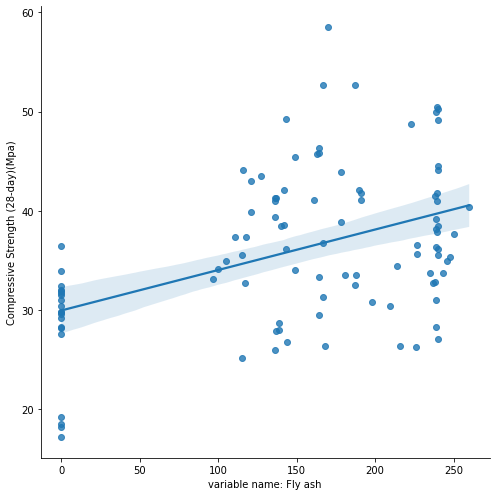

<Figure size 720x432 with 0 Axes>

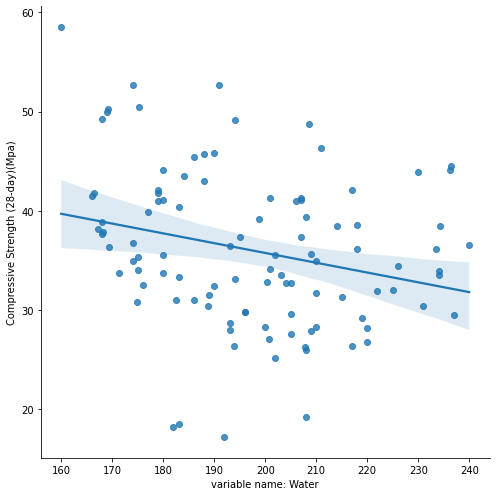

<Figure size 720x432 with 0 Axes>

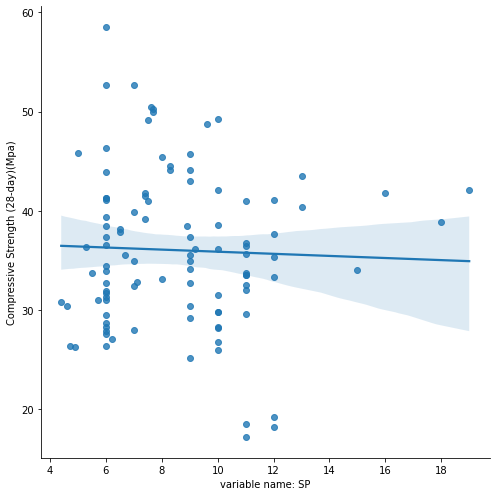

<Figure size 720x432 with 0 Axes>

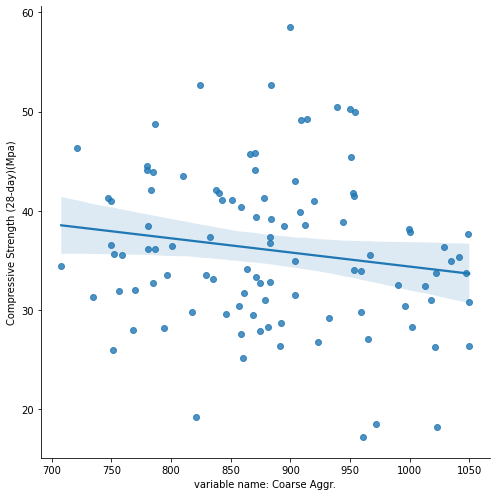

<Figure size 720x432 with 0 Axes>

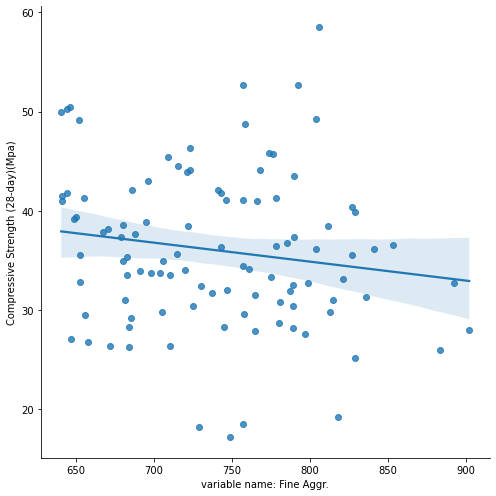

<Figure size 720x432 with 0 Axes>

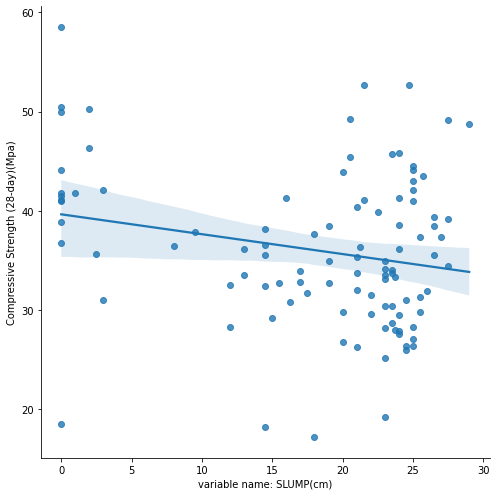

<Figure size 720x432 with 0 Axes>

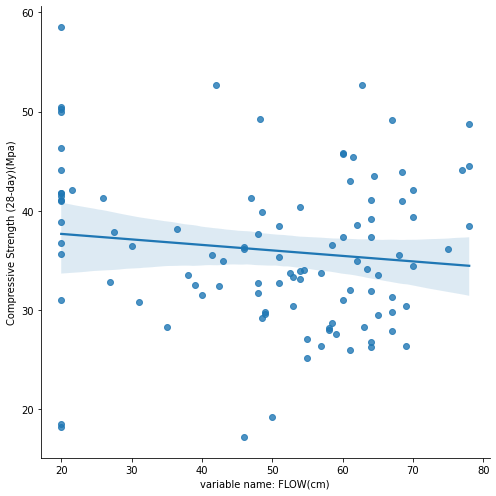

In [21]:
plot_relation(df,"Compressive Strength (28-day)(Mpa)" );

## Scaling

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

##  1. Model Building (Linear Regression)

In [25]:
# y_pred = b1X + b0

In [28]:
model_poly = LinearRegression()

### 1.1 Interpret the model

In [29]:
model_poly.fit(scaled_X_train, y_train)

LinearRegression()

### 1.2 Model Evaluation

In [30]:
y_pred = model_poly.predict(scaled_X_test)
y_train_pred = model_poly.predict(scaled_X_train)

In [31]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
30,45.820,44.943,0.877
67,40.340,41.169,-0.829
62,28.290,28.563,-0.273
47,43.010,39.211,3.799
42,33.510,35.282,-1.772
40,35.660,39.457,-3.797
90,35.520,37.252,-1.732
45,31.770,31.227,0.543
10,26.020,28.770,-2.750
0,34.990,34.480,0.510


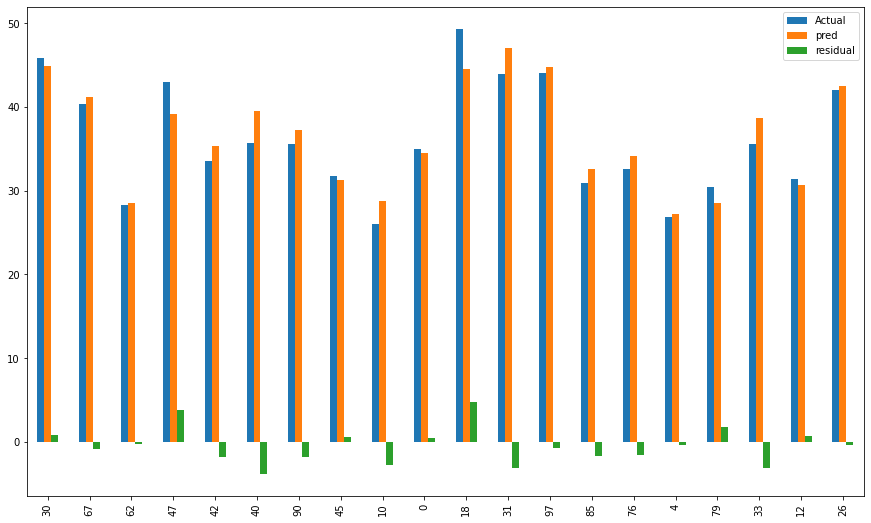

In [32]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

In [33]:
model_poly.coef_

array([ 3.73690789, -2.84833966,  3.20875858, -5.16495691, -0.05694117,
       -5.83872896, -3.18557505, -2.41794917,  1.51351431])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metric(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [35]:
ls =eval_metric(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


## Cross Validate

In [37]:
model = LinearRegression() # model sıfırlanır
scores = cross_validate(model,scaled_X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [38]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002,0.002,0.870,-2.263,-7.103,-2.665
2,0.002,0.002,0.719,-2.241,-9.754,-3.123
3,0.001,0.001,0.935,-1.570,-3.284,-1.812
4,0.001,0.001,0.886,-2.510,-10.985,-3.314
5,0.001,0.001,0.880,-2.346,-7.695,-2.774


In [39]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.858
test_neg_mean_absolute_error       -2.186
test_neg_mean_squared_error        -7.764
test_neg_root_mean_squared_error   -2.738
dtype: float64

In [40]:
ls_cv = eval_metric(y_train, y_train_pred, y_test, y_pred, "linear")

In [41]:
print("train RMSE:", 2.423698/df["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", 2.737927/df["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725257718905493
CV RMSE: 0.07597177821060941


In [42]:
lm_df = pd.DataFrame(model_poly.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,3.737
1,-2.848
2,3.209
3,-5.165
4,-0.057
5,-5.839
6,-3.186
7,-2.418
8,1.514


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [45]:
ridge_model = Ridge(alpha=1, random_state=42)

In [46]:
ridge_model.fit(scaled_X_train, y_train)

Ridge(alpha=1, random_state=42)

In [47]:
y_pred = ridge_model.predict(scaled_X_test)
y_train_pred = ridge_model.predict(scaled_X_train)

In [48]:
rs = eval_metric(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


## For Ridge Regression CV

In [49]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model,scaled_X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [50]:
ridge_cv_model = RidgeCV(alphas=[0.9181], cv = 10, scoring= "neg_root_mean_squared_error")

In [51]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)
y_train=pd.DataFrame(y_train)

In [52]:
ridge_cv_model.fit(scaled_X_train, y_train)

RidgeCV(alphas=array([0.9181]), cv=10, scoring='neg_root_mean_squared_error')

In [53]:
y_pred = ridge_cv_model.predict(scaled_X_test)
y_train_pred = ridge_cv_model.predict(scaled_X_train)

In [54]:
rcs = eval_metric(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.917,4.485
rmse,2.432,2.118


## 2.2 Lasso (Apply and evalute)

In [55]:
lsr = LassoCV(alphas=[0.9181], cv = 10,random_state=42)

lsr.fit(scaled_X_train,y_train)


LassoCV(alphas=[0.9181], cv=10, random_state=42)

In [56]:
y_pred = lsr.predict(scaled_X_test)
y_train_pred =lsr.predict(scaled_X_train)

In [57]:
lsr = eval_metric(y_train, y_train_pred, y_test, y_pred, "lasso_cv") 
lsr

,lasso_cv_train,lasso_cv_test
R2,0.795,0.818
mae,2.844,2.352
mse,12.957,9.201
rmse,3.600,3.033


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [58]:
enet = ElasticNet(random_state=42).fit(scaled_X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, enet.predict(scaled_X_test))))
enet_cv = ElasticNetCV(cv = 10, random_state=1).fit(scaled_X_train, y_train)
enet_tuned = ElasticNet(alpha=enet_cv.alpha_).fit(scaled_X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, enet_tuned.predict(scaled_X_test))))

4.297257169398377
2.1120249391896087


In [59]:
y_pred = enet.predict(scaled_X_test)
y_train_pred =enet.predict(scaled_X_train)

In [60]:
esr = eval_metric(y_train, y_train_pred, y_test, y_pred, "enet_cv") 
esr

,enet_cv_train,enet_cv_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [61]:
all_scores = pd.concat([ls,ls_cv,rs,rcs,lsr,esr],axis=1)
all_scores

,linear_train,linear_test,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,enet_cv_train,enet_cv_test
R2,0.900,0.921,0.900,0.921,0.899,0.922,0.906,0.911,0.795,0.818,0.637,0.635
mae,1.992,1.716,1.992,1.716,2.003,1.699,1.938,1.732,2.844,2.352,3.803,3.556
mse,6.237,4.439,6.237,4.439,6.313,4.398,5.917,4.485,12.957,9.201,22.982,18.466
rmse,2.497,2.107,2.497,2.107,2.513,2.097,2.432,2.118,3.600,3.033,4.794,4.297
